<a href="https://colab.research.google.com/github/simasaadi/permit-to-take-water-ontario/blob/main/01_overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Ontario Permit to Take Water – Data Overview

This notebook provides an initial overview of the Permit to Take Water (PTTW) dataset for Ontario, including:
- loading the raw data
- inspecting structure, data types, and missing values
- getting first summaries of permits by purpose, sector, and status



In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)

sns.set(style="whitegrid")


In [3]:
import os

os.makedirs("data/raw", exist_ok=True)
os.makedirs("data/processed", exist_ok=True)

os.listdir()


['.config', 'data', 'sample_data']

In [12]:
import os

print(os.listdir())
print(os.listdir("data"))
print(os.listdir("data/raw"))


['.config', 'data', 'sample_data']
['raw', 'processed']
['PermitsToTakeWater.csv', '.ipynb_checkpoints']


In [14]:
import pandas as pd

DATA_PATH = "data/raw/PermitsToTakeWater.csv"

pttw_raw = pd.read_csv(DATA_PATH, encoding="latin1")
pttw_raw.head()


,PermitNo,ClientName,PurposeCat,SPurpose,ExpiryDate,IssuedDate,RenewDate,OldCtyTwn,P_Lot,P_Con,P_Municip,P_UpperT,P_LowerT,SurfGrnd,SourceID,Easting,Northing,UTMZone,MaxL_Day,Days_Year,Hrs_DayMax,L_Minute,Amended_by,Expired_by,Permit_End,ACTIVE,LATITUDE,LONGITUDE
0,0000-75EL6R,Dee Jay Camps Limited,Dewatering Construction,Construction,09/28/2007,08/10/2007,,OldCT not entered,26,,Wasaga Beach,County of Simcoe,,Ground Water,Wellpoint System,580422,4928153,17,400000.0,30.0,24.0,277.0,7463-77ERKL,,39353.0,No,44.502216,-79.988337
1,0000-AZXQE2,Carlex Corporation Inc. as general partner for...,Construction,Other - Construction,09/30/2018,06/26/2018,,OldCT not entered,19km upstream (south of the Town of Smooth Roc...,3,Smooth Rock Falls,District of Cochrane,,Surface Water,Mattagami River,455179,5441181,17,201600.0,363.0,24.0,140.0,,,43373.0,No,49.121831,-81.614291
2,0000-BP7UPH,The Regional Municipality of Waterloo,Dewatering Construction,Construction,04/30/2023,05/04/2020,,OldCT not entered,Fischer Hallman Rd,,Kitchener,Regional Municipality of Waterloo,,Ground Water,MH7 to MH88A,540833,4805376,17,2745000.0,365.0,24.0,1906.0,,,NaN,Yes,43.400152,-80.495749
3,0001-8X8P7E,,Agricultural,Field and Pasture Crops,08/15/2022,08/16/2012,,OldCT not entered,,,Malahide,County of Elgin,,Ground Water,Farm Pond,506219,4737385,17,240480.0,60.0,24.0,167.0,,,NaN,Yes,42.788983,-80.923961
4,0001-9RHKU6,Ducks Unlimited Canada,Recreational,Wetlands,09/30/2024,01/12/2015,,OldCT not entered,15-Dec,,Hamilton,NaN,,Surface Water,Pond 1,592212,4773461,17,14112000.0,365.0,24.0,9800.0,,,42458.0,No,43.108267,-79.866693


In [16]:
# Column names
pttw_raw.columns.tolist()


['PermitNo',
 'ClientName',
 'PurposeCat',
 'SPurpose',
 'ExpiryDate',
 'IssuedDate',
 'RenewDate',
 'OldCtyTwn',
 'P_Lot',
 'P_Con',
 'P_Municip',
 'P_UpperT',
 'P_LowerT',
 'SurfGrnd',
 'SourceID',
 'Easting',
 'Northing',
 'UTMZone',
 'MaxL_Day',
 'Days_Year',
 'Hrs_DayMax',
 'L_Minute',
 'Amended_by',
 'Expired_by',
 'Permit_End',
 'ACTIVE',
 'LATITUDE',
 'LONGITUDE']

In [17]:
# Data types and non-null counts
pttw_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66003 entries, 0 to 66002
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PermitNo    66003 non-null  object 
 1   ClientName  66003 non-null  object 
 2   PurposeCat  66003 non-null  object 
 3   SPurpose    66003 non-null  object 
 4   ExpiryDate  65815 non-null  object 
 5   IssuedDate  65045 non-null  object 
 6   RenewDate   66003 non-null  object 
 7   OldCtyTwn   66003 non-null  object 
 8   P_Lot       65997 non-null  object 
 9   P_Con       66003 non-null  object 
 10  P_Municip   66003 non-null  object 
 11  P_UpperT    56938 non-null  object 
 12  P_LowerT    66003 non-null  object 
 13  SurfGrnd    66003 non-null  object 
 14  SourceID    65233 non-null  object 
 15  Easting     66003 non-null  int64  
 16  Northing    66003 non-null  int64  
 17  UTMZone     66003 non-null  int64  
 18  MaxL_Day    66003 non-null  float64
 19  Days_Year   66003 non-nul

In [18]:
date_cols = ["IssuedDate", "ExpiryDate", "RenewDate", "Permit_End"]

for col in date_cols:
    pttw_raw[col] = pd.to_datetime(pttw_raw[col], errors="coerce")

pttw_raw[date_cols].head()


/tmp/ipython-input-3079105366.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pttw_raw[col] = pd.to_datetime(pttw_raw[col], errors="coerce")


,IssuedDate,ExpiryDate,RenewDate,Permit_End
0,2007-08-10,2007-09-28,NaT,1970-01-01 00:00:00.000039353
1,2018-06-26,2018-09-30,NaT,1970-01-01 00:00:00.000043373
2,2020-05-04,2023-04-30,NaT,NaT
3,2012-08-16,2022-08-15,NaT,NaT
4,2015-01-12,2024-09-30,NaT,1970-01-01 00:00:00.000042458


In [19]:
pttw_raw["IssuedDate"].min(), pttw_raw["IssuedDate"].max()


(Timestamp('1960-04-25 00:00:00'), Timestamp('2135-09-08 00:00:00'))

In [20]:
missing_summary = (
    pttw_raw.isna()
    .mean()
    .sort_values(ascending=False)
    .to_frame("missing_fraction")
)

missing_summary.head(20)


,missing_fraction
RenewDate,0.911534
P_UpperT,0.137342
Permit_End,0.136221
IssuedDate,0.014560
SourceID,0.011666
ExpiryDate,0.006136
P_Lot,0.000091
PurposeCat,0.000000
SPurpose,0.000000
OldCtyTwn,0.000000


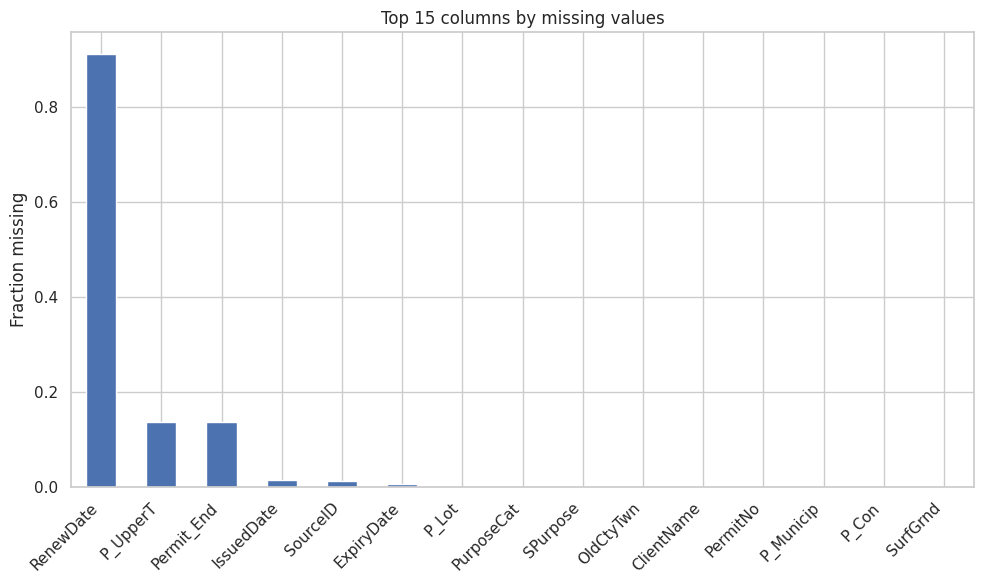

In [21]:
plt.figure(figsize=(10, 6))
missing_summary.head(15)["missing_fraction"].plot(kind="bar")
plt.ylabel("Fraction missing")
plt.title("Top 15 columns by missing values")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [22]:
# ACTIVE status
pttw_raw["ACTIVE"].value_counts(dropna=False)


,count
ACTIVE,
No,57012
Yes,8991


In [23]:
# High-level purpose
pttw_raw["PurposeCat"].value_counts(dropna=False).head(20)


,count
PurposeCat,
Agricultural,14852
Dewatering Construction,14518
Water Supply,8865
Commercial,6729
Miscellaneous,5866
Industrial,5408
Dewatering,3809
Construction,3084
Remediation,1666


In [24]:
# Specific purpose
pttw_raw["SPurpose"].value_counts(dropna=False).head(20)


,count
SPurpose,
Construction,14746
Municipal,5988
Field and Pasture Crops,5320
Golf Course Irrigation,4665
Other - Agricultural,4432
Pumping Test,3112
Tobacco,3103
Other - Dewatering,2234
Other - Industrial,2062


In [25]:
# Surface vs groundwater
pttw_raw["SurfGrnd"].value_counts(dropna=False)


,count
SurfGrnd,
Ground Water,28769
Surface Water,22169
Surface and Ground Water,13036
Pumping Test,1792
,237


In [26]:
volume_cols = ["MaxL_Day", "Days_Year", "Hrs_DayMax", "L_Minute"]

pttw_raw[volume_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
MaxL_Day,66003.0,3.593409e+08,6.939313e+10,0.0,295200.0,1010880.0,2945808.0,1.780000e+13
Days_Year,66003.0,1.698821e+02,2.096020e+02,0.0,20.0,122.0,365.0,3.651500e+04
Hrs_DayMax,66003.0,7.012652e+01,1.001430e+04,0.0,12.0,24.0,24.0,2.498364e+06
L_Minute,66003.0,6.598476e+05,1.068974e+08,0.0,227.5,1138.0,2955.0,2.700000e+10


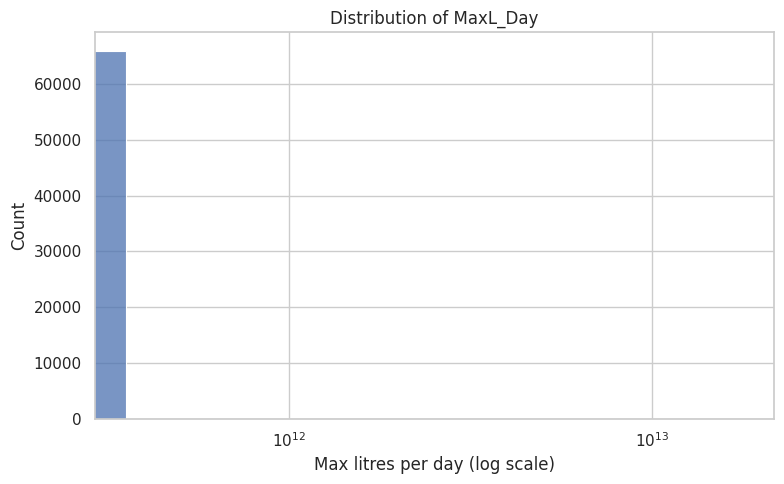

In [27]:
plt.figure(figsize=(8, 5))
sns.histplot(pttw_raw["MaxL_Day"], bins=50)
plt.xscale("log")
plt.xlabel("Max litres per day (log scale)")
plt.title("Distribution of MaxL_Day")
plt.tight_layout()
plt.show()


In [28]:
pttw_raw["IssuedYear"] = pttw_raw["IssuedDate"].dt.year
pttw_raw["IssuedYear"].describe()


,IssuedYear
count,65042.000000
mean,2005.635174
std,12.814976
min,1960.000000
25%,2002.000000
50%,2009.000000
75%,2014.000000
max,2135.000000


In [29]:
permits_per_year = (
    pttw_raw
    .groupby("IssuedYear")["PermitNo"]
    .count()
    .rename("permit_count")
)

permits_per_year.head()


,permit_count
IssuedYear,
1960.0,3
1961.0,7
1962.0,24
1963.0,1004
1964.0,106


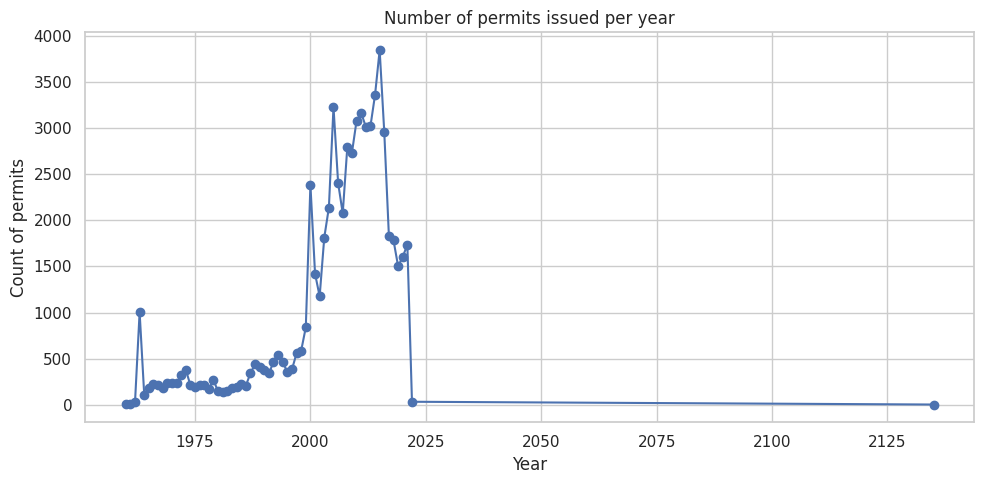

In [30]:
plt.figure(figsize=(10, 5))
permits_per_year.plot(marker="o")
plt.title("Number of permits issued per year")
plt.xlabel("Year")
plt.ylabel("Count of permits")
plt.grid(True)
plt.tight_layout()
plt.show()


In [31]:
purpose_volume = (
    pttw_raw.groupby("PurposeCat")["MaxL_Day"]
    .sum()
    .sort_values(ascending=False)
)

purpose_volume.head(10)


,MaxL_Day
PurposeCat,
Agricultural,1.782634e+13
Dewatering Construction,2.338745e+12
Industrial,1.724509e+12
Miscellaneous,1.552382e+12
Dewatering,1.121416e+11
Water Supply,8.405349e+10
Construction,4.041859e+10
Commercial,1.350449e+10
Recreational,9.515130e+09


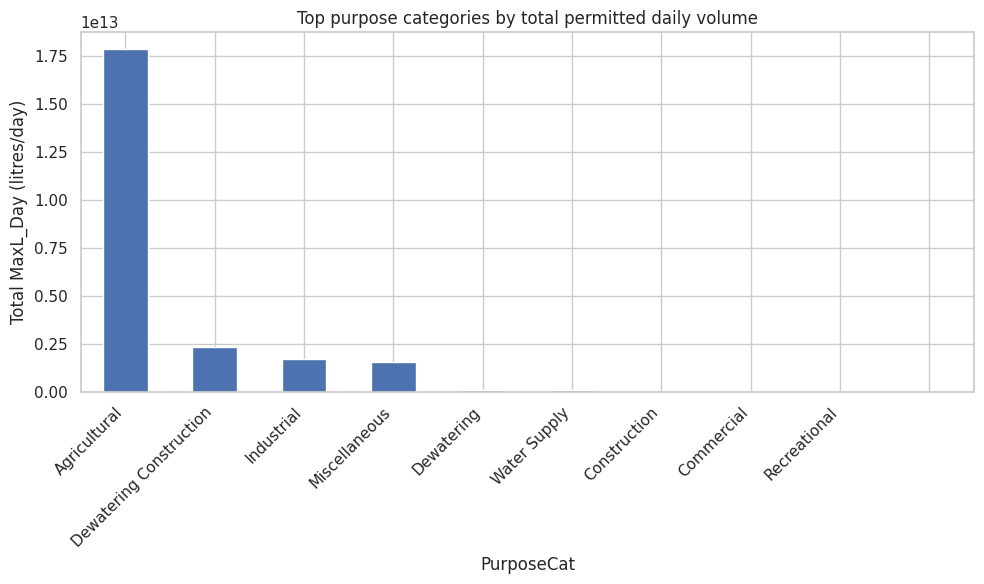

In [32]:
plt.figure(figsize=(10, 6))
purpose_volume.head(10).plot(kind="bar")
plt.ylabel("Total MaxL_Day (litres/day)")
plt.title("Top purpose categories by total permitted daily volume")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [33]:
active = pttw_raw[pttw_raw["ACTIVE"] == "Yes"].copy()

active_purpose_volume = (
    active.groupby("PurposeCat")["MaxL_Day"]
    .sum()
    .sort_values(ascending=False)
)

active_purpose_volume.head(10)


,MaxL_Day
PurposeCat,
Industrial,3.634959e+11
Miscellaneous,3.507953e+10
Water Supply,1.676162e+10
Dewatering Construction,1.173813e+10
Agricultural,5.237638e+09
Dewatering,4.789636e+09
Commercial,2.407652e+09
Construction,1.025670e+09
Remediation,6.205726e+08


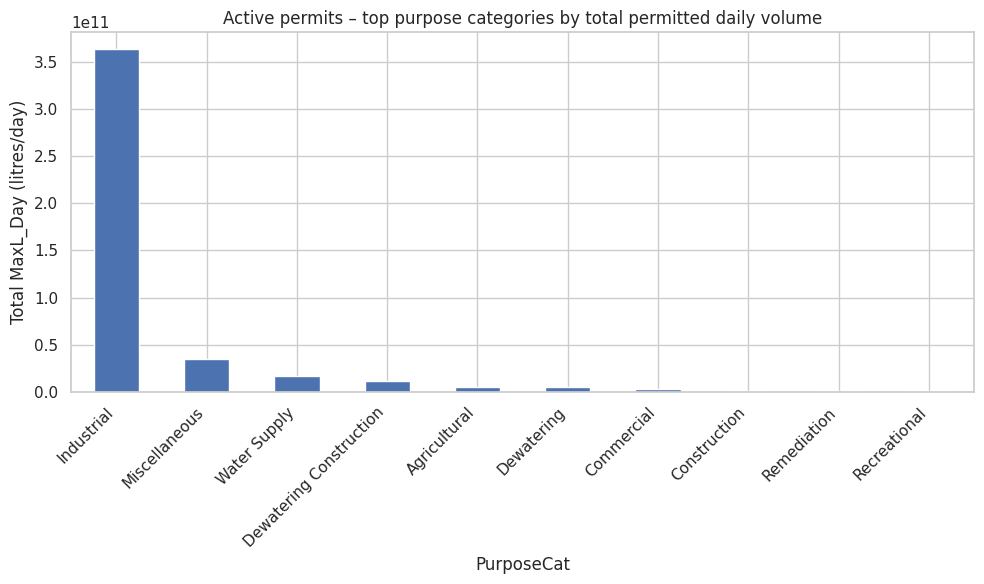

In [34]:
plt.figure(figsize=(10, 6))
active_purpose_volume.head(10).plot(kind="bar")
plt.ylabel("Total MaxL_Day (litres/day)")
plt.title("Active permits – top purpose categories by total permitted daily volume")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [35]:
pttw_raw[["LATITUDE", "LONGITUDE"]].describe()


,LATITUDE,LONGITUDE
count,66003.000000,66003.000000
mean,44.553275,-80.246894
std,2.035449,3.110057
min,41.748947,-95.111422
25%,43.162465,-80.747426
50%,43.978658,-80.052039
75%,45.143760,-79.252490
max,55.709593,-74.377171


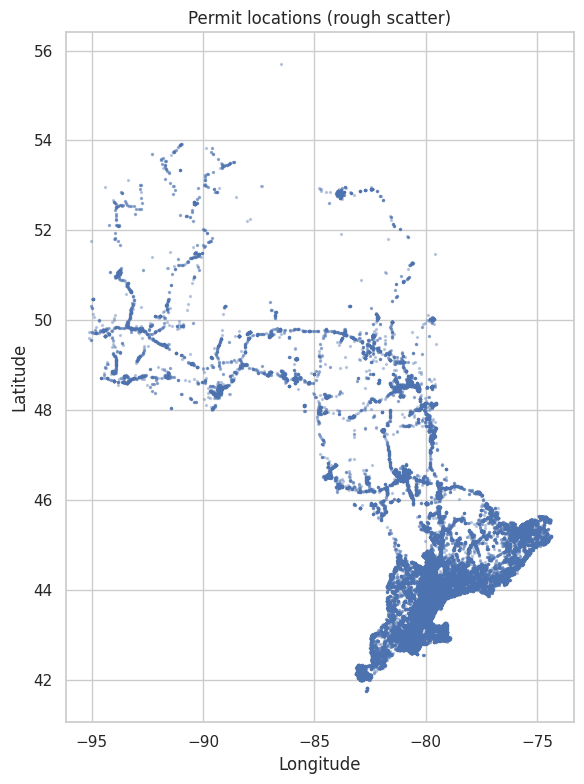

In [36]:
plt.figure(figsize=(6, 8))
plt.scatter(
    pttw_raw["LONGITUDE"],
    pttw_raw["LATITUDE"],
    s=2,
    alpha=0.3
)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Permit locations (rough scatter)")
plt.tight_layout()
plt.show()


In [37]:
processed_dir = "data/processed"
os.makedirs(processed_dir, exist_ok=True)

output_path = os.path.join(processed_dir, "pttw_clean_base.parquet")
pttw_raw.to_parquet(output_path, index=False)

output_path


'data/processed/pttw_clean_base.parquet'